**CSCI4750/5750: Introduction to Object Recognition With Deep Learning**

Author: Jie Hou, Oct 27, Fall 2020

*For ML practicum only in the machine learning course (CSCI4750/5750).* 

Object detection is an important machine/deep learning topic in the advancement of computer vision that aims to locate and classify a number of objects on an image. The advanced deep learning architectures (i.e., convolutional neural network) empower the object detection applications. As shown in **Figure 1**,  object detection aims to accurately detect objects such as humans, animals, buildings, and cars from images or videos (video can be processed as a sequence of images, called a frame).  
*`Given a large number of labeled image data,  we can predict each bounding box's location using machine learning methods such as regression models in supervised learning`*. 


<div align="center">
<img src=https://miro.medium.com/max/503/1*xWntyXM0W-SuDMgWMM6mCg.png width="300">
<p>Figure 1. Example output from object detection application</p>
</div>

<div align="center">
<img src="https://cs.slu.edu/~hou/5750/homework/hw07/text.png" width="500">

<p>Figure 2. Example output from this practicum</p>
</div>

In our machine learning class, we have learned and practiced the following topics:
1. data collection (i.e., Kaggle, UCI)
2. data processing (i.e. feature scaling/normlaization)
3. data preparation (i.e. generating training/validation/testing)
4. implementation of basic machine learning algorithms (i.e., decision tree, KNN, perceptron, regression)
5. performance evaluation (i.e., accuracy, precision, recall)

Specifically, we had an introduction to deep learning (i.e., neural network, CNN) with optimized gradient descent techniques, `although simple, it is actually sufficient for us to use the knowledge we have learned so far to practice a framework for object detection, such as predicting the location of the object via bounding box in an image using regression techniques, as shown in Figure 2`. 
We will also develop a method to classify the object into a specific category using deep convolutional network. 

Again, let's start with the pipeline/workflow when building machine learning models. As shown in **Figure 3**, this practicum contains nine major steps:
1. Data collection
2. Data visualization
3. Data Preprocessing
4. Splitting data into training/validation/testing
5. Configuring ML model
6. Training ML model
7. Performance evaluation
8. Testing on real data
9. Labeling our own images for model validation

<div align="center">
<img src="https://cs.slu.edu/~hou/5750/homework/hw07/Flowchart.png" width="600">
<p>Figure 3. Flowchart for this practicum</p>
</div>

The last part of this practicum provides several scenarios for students to practice the parameter tunning that potentially affects object detection performance. Feel free to adjust the parameters, such as the number of training data, number of hidden layers, number of neurons in hidden layers as well as effects using pre-trained models.

Now let's start practice each step in the workflow (Figure 3) to implement our first object detection model.

**Reference**

[1] Redmon, Joseph, et al. "You only look once: Unified, real-time object detection." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016. [paper of YOLO for object detection](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Redmon_You_Only_Look_CVPR_2016_paper.pdf)

[2] Liu, Wei, et al. "Ssd: Single shot multibox detector." European conference on computer vision. Springer, Cham, 2016. [paper of SSD for object detection](https://arxiv.org/pdf/1512.02325.pdf)

[3] Image source: [google images](https://www.google.com/search?q=object+detection&sxsrf=ALeKk01fMrLyUj-MtP0m1s5wzbiZCY3s0A:1584324329424&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjHv_SG9J3oAhUMUt8KHSHzDJIQ_AUoAXoECBUQAw&cshid=1584324337548427)

[4] Useful resources: [Kaggle dataset for object detection](https://www.kaggle.com/tags/object-detection); [YOLO2 codes](https://www.kaggle.com/sajinpgupta/object-detection-yolov2);[Sample codes for practicum](https://github.com/jrieke/shape-detection)

[5] Image labeling tools: [LabelImg](https://github.com/tzutalin/labelImg); [other options](https://www.datasetlist.com/tools/)

**Setup working directory on Google Colab (you can also skip this step)**

*First, we need to mount the google drive so that we can access the images from google drive.*


In [ ]:
import os
from google.colab import drive 
drive.mount('/content/drive')

work_dir = '/content/drive/My Drive/object_detection_practicum_oct27'
os.makedirs(work_dir, exist_ok=True)
os.chdir(work_dir)
%pwd 
%ls

Mounted at /content/drive
checkmodel.h5       imgs_backup_10000.npy      imgs_box_backup_20000.npy
dataset_object/     imgs_backup_20000.npy      object_detection_model_simple.h5
dataset_object.zip  imgs_box_backup_10000.npy


*Then we go to the working directory, so that we can save the datasets and trained models.*


**Step 1:Data collection**

The first step in ML is data collection. There are different ways to collect the data. You can either download data from public datbases such as [Kaggle](https://www.kaggle.com/tags/object-detection),  or use your own dataset collected from daily life or research projects. 

While each approach has its own pros and cons. For object detection task, enough labeled data is necessary to train an accurate machine learning model, however, labeling images is a time-consuming and tedious process. Public database provides large number of annotated image data for researchers to develop latest algorithms, but may be less relavent to the specific research project. Many novel researches may have collected large amount of precious images, but do not have enough time and energy to label them completely. 

Specifically, in this practicum, we just manully construct the training images with interested object embedded, which can make data collection step much simpler so that we can focus on understanding how the object can be detected using machine learning methods.

**Let's start with downloading the interested images I collected for this practicum.**

In [ ]:
!rm -rf dataset_object
!rm -rf dataset_object*zip
#!wget https://cs.slu.edu/~hou/5750/data/object_detection/dataset_object.zip --no-check-certificate
!wget https://cs.slu.edu/~hou/5750/homework/hw07/dataset_object.zip --no-check-certificate
!unzip  dataset_object.zip


--2020-11-10 18:10:01--  https://cs.slu.edu/~hou/5750/homework/hw07/dataset_object.zip
Resolving cs.slu.edu (cs.slu.edu)... 165.134.107.79
Connecting to cs.slu.edu (cs.slu.edu)|165.134.107.79|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 103318 (101K) [application/zip]
Saving to: ‘dataset_object.zip’

dataset_object.zip  100%[===================>] 100.90K   280KB/s    in 0.4s    

2020-11-10 18:10:02 (280 KB/s) - ‘dataset_object.zip’ saved [103318/103318]

Archive:  dataset_object.zip
   creating: dataset_object/
  inflating: dataset_object/StopSign_1.jpg  
  inflating: dataset_object/car_1.jpg  
   creating: dataset_object/test_data/
  inflating: dataset_object/test_data/test_1.xml  
  inflating: dataset_object/test_data/test_6.jpg  
  inflating: dataset_object/test_data/test_5.jpg  
  inflating: dataset_object/test_data/test_4.jpg  
  inflating: dataset_object/test_data/test_3.jpg  
  inflating: dataset_ob

In [ ]:
# check the files in current folder
%ls dataset_object/

car_1.jpg  StopSign_1.jpg  test_data/


In [ ]:
%ls

checkmodel.h5       imgs_backup_10000.npy      imgs_box_backup_20000.npy
dataset_object/     imgs_backup_20000.npy      object_detection_model_simple.h5
dataset_object.zip  imgs_box_backup_10000.npy


**Step 2: Data Visualization**

The second step is data visualization, which plays an important role in data analysis and exploration. A good visualization can help us better understand the input data and provide better insights for data preprocessing as well as feature extraction for later model training.



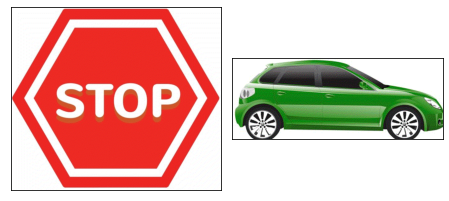

In [ ]:
from matplotlib import pyplot as plt
import glob

import base64
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

## plot first image
img_path ='dataset_object/StopSign_1.jpg'
ax = fig.add_subplot(1,2,1, xticks=[], yticks=[])
# PIL image, convert to mode "P" to translates pixels through the palette and range of pixels still in [0,255] with color image 
img = Image.open(img_path).convert("P") 
ax.imshow(img)
img.close()

## plot second image
img_path ='dataset_object/car_1.jpg'
ax = fig.add_subplot(1,2,2, xticks=[], yticks=[])
img = Image.open(img_path).convert("P") 
ax.imshow(img)
img.close()


**Step 3: Data preprocessing and Build in-hosue Dataset**

In this section, we plan to create several images with a stop sign as well as a different number of cars embedded. Using this way, we can also easily provide the bounding box's location in the image, which can be considered as the label for supervised learning. In other words, in this practicum, we would like to predict the real-value properties of the bounding box (i.e., x, y, width, height) inside the image using regression models.
In order to create a good training dataset for object detection learning, let's first understand three steps we used here in image preprocessing.
1. Set uniform image format: before feeding digital images into the machine learning pipeline, we need first unify the form of images. For instance, all imaged should be saved in the 'png' format.
2. Read image: in this step, we can load images using function 'PIL.open' with 'RGB' color mode activated. Instead of using all three channels (red, blue, green), we plan to only one channel for this study. So we can convert to mode "P" to translates pixels through the palette and range of pixels still within [0,255]. The image will be saved as arrays of pixels in python.
3. Resize image: many machine learning algorithms require fixed image size as input, while many digital images captured by machines vary in size. Therefore, 

we need to resize all images to a base size (i.e., 128X128 or 256X256) before feeding into machine learning algorithms.

More details for image processing using python can be found at [tutorial for image processing](https://auth0.com/blog/image-processing-in-python-with-pillow/).



In [ ]:
import numpy as np
import random

def create_inhouse_dataset(num_imgs, img_size = 128):
    ### num_imgs: number of images to create (Note: increase this number may improve performance)
    ### img_size: set image size to 128*128 (Note: can also practice different size)


    ### size of bounding box for object
    stop_size_min = 30
    stop_size_max = 50

    ### number of interested object, here we set 1 for simplicity
    num_objects = 1

    ### create arrays to store images (X)
    imgs = np.empty((num_imgs, img_size, img_size))  # set image background to 255 (white)
    imgs.fill(255)

    ### create arrays to store boundary boxes (Y)
    bboxes = np.zeros((num_imgs, num_objects, 4))

    ### Start create custom images
    for i_img in range(num_imgs):
        
        boxes_cur = [] # check overlap
        for i_object in range(num_objects):
          
          ### sample the width and height for object
          width, height = np.random.randint(stop_size_min, stop_size_max, size=2)
          
          ### sample location to put object in image
          row = np.random.randint(0, img_size - height)
          column = np.random.randint(0, img_size - width)


          img_path ='dataset_object/StopSign_1.jpg'
          img = Image.open(img_path) # RGB mode with three channel
          # PIL image, convert to mode "P" to translates pixels through the palette and range of pixels still in [0,255] with color image 
          img = img.convert("P")  # convert into one channel
          img = img.resize((width, height)) # resize

          # convert into numpy array
          img_data = np.asarray(img).copy()
          img_data[img_data>=np.quantile(img_data, .6)] = 255 # set background to white
          imgs[i_img, row:row+height, column:column+width] = np.asarray(img_data)  # set local region to this object
          bboxes[i_img, i_object] = [column, row, width, height]
          boxes_cur.append([column, row, width, height]) # store the region that has been embedded.
        

        ### number of non-interested objects (car) to be added
        num_car = np.random.randint(3, 10)
        width,height= 40,20
        for pos in range(0, int(img_size/width)*int(img_size/height)):
              row = int(pos/int(img_size/width))*height
              column = int(pos % int(img_size/width))*width
              ### check if overlaping with any objects
              check_valid = True
              for bbox in boxes_cur:
                  x1, y1, w1, h1 = bbox[0], bbox[1], bbox[2], bbox[3]
                  x2, y2, w2, h2 = column, row, width, height
                  w_I = min(x1 + w1, x2 + w2) - max(x1, x2)
                  h_I = min(y1 + h1, y2 + h2) - max(y1, y2)
                  if w_I > 0 or h_I > 0:  #  overlap
                      check_valid = False
                      break
              if check_valid:
                boxes_cur.append([column, row, width, height])
                img_path ='dataset_object/car_1.jpg'
                img = Image.open(img_path).convert("P") 
                img = img.resize((width, height))
                img_data = np.asarray(img).copy()
                img_data[img_data>np.quantile(img_data, .6)] = 255 # set background to white
                imgs[i_img, row:row+height, column:column+width] = np.asarray(img_data)  # set local region to this object
                if len(boxes_cur)-1<num_car:
                  continue
                else:
                  break
    return imgs, bboxes



**Generate the dataset**

In [ ]:

# set to 100 for demo, but high accuracy can be achievied with number set to 50000
num_imgs = 10000

### set image size to 128*128 (Note: can also practice different size)
img_size = 128 

imgs, bboxes = create_inhouse_dataset(num_imgs, img_size = 128) # may take time if num_imgs is set too large

imgs.shape, bboxes.shape

((10000, 128, 128), (10000, 1, 4))

In [ ]:
# save the train data for later use.
save_data = True
if save_data:
  import numpy as np
  np.save('imgs_backup_20000', imgs) 
  np.save('imgs_box_backup_20000', bboxes) 

**Visualize the curated image data and bounding box**

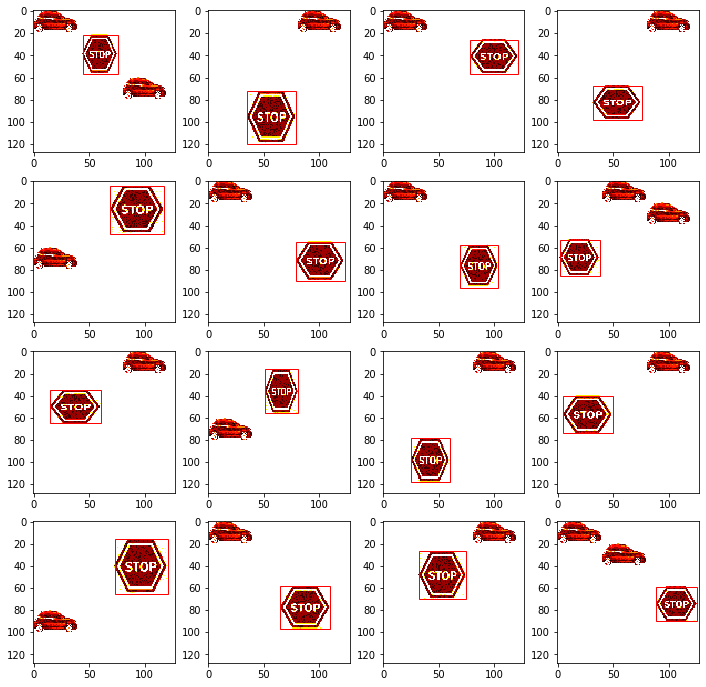

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.figure(figsize=(12, 12))
for img_idx in range(1,17):
    plt.subplot(4, 4, img_idx)
    img = Image.fromarray(imgs[img_idx])
    plt.imshow(imgs[img_idx], cmap='hot', interpolation='nearest')
    for bbox in bboxes[img_idx]:
        plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))


**Perform normalization on images with mean 0 and std 1**

The mean and std need be kept to normalize test data later. Each image is reshaped to a 1D vector of pixel values from the 2D matrix.

In [ ]:
num_imgs=imgs.shape[0]

X = (imgs.reshape(num_imgs, -1) - np.mean(imgs)) / np.std(imgs)

# save the mean and std
train_mean = np.mean(imgs)
train_std = np.std(imgs)

print(X.shape, train_mean, train_std)

(10000, 16384) 237.2731448425293 57.37121147511334


In [ ]:
print(np.std(imgs), np.mean(imgs),train_mean, train_std)

57.37121147511334 237.2731448425293 237.2731448425293 57.37121147511334


**Instead of predicting absolute values, we should predict the relative locations to image size.** 

Therefore, we need normalize (x, y, width, height) by img_size so that all values are between 0 and 1.


In [ ]:
y = bboxes.reshape(num_imgs, -1) / img_size

y.shape, np.mean(y), np.std(y)

print(y)

[[0.25      0.046875  0.296875  0.25     ]
 [0.34375   0.171875  0.25      0.2734375]
 [0.2734375 0.5625    0.34375   0.375    ]
 ...
 [0.2265625 0.2421875 0.296875  0.328125 ]
 [0.1640625 0.3828125 0.3359375 0.3515625]
 [0.1171875 0.4921875 0.234375  0.3515625]]


**Step 4: Generate Training/Validation/Testing**

Before training the algorithm, we should split the dataset into subsets, named Training/Validation/Testing data. The validation data can help the algorithm to choose adequate parameters or avoid overfitting (early stop in gradient descent) when learning on training data.

To accomplish this task, we can use 'ShuffleSplit' in sklearn to split data into subsets. (Here, we only split into two sets; the validation data can be set inside the training algorithm later).


In [ ]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=1, test_size=.2, random_state=0)
for train_index, test_index in split.split(X):
    #print("TRAIN:", train_index, "\nTEST:", test_index)
    train_X = X[train_index]
    test_X = X[test_index]
    train_y = y[train_index]
    test_y = y[test_index]
    test_imgs = imgs[test_index]
    test_bboxes = bboxes[test_index]
    train_bboxes = bboxes[train_index]

In [ ]:
print(train_X.shape)
print(test_X.shape)

(8000, 16384)
(2000, 16384)


In [ ]:
print(train_X)

[[0.3089852 0.3089852 0.3089852 ... 0.3089852 0.3089852 0.3089852]
 [0.3089852 0.3089852 0.3089852 ... 0.3089852 0.3089852 0.3089852]
 [0.3089852 0.3089852 0.3089852 ... 0.3089852 0.3089852 0.3089852]
 ...
 [0.3089852 0.3089852 0.3089852 ... 0.3089852 0.3089852 0.3089852]
 [0.3089852 0.3089852 0.3089852 ... 0.3089852 0.3089852 0.3089852]
 [0.3089852 0.3089852 0.3089852 ... 0.3089852 0.3089852 0.3089852]]


In [ ]:
### Define the calculation of IoU score
def IOU(bbox1, bbox2):
    '''Calculate overlap between two bounding boxes [x, y, w, h] as the area of intersection over the area of unity'''
    x1, y1, w1, h1 = bbox1[0], bbox1[1], bbox1[2], bbox1[3]
    x2, y2, w2, h2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]

    w_I = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_I = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_I <= 0 or h_I <= 0:  # no overlap
        return 0.
    I = w_I * h_I

    U = w1 * h1 + w2 * h2 - I

    return I / U

**Step 5: Configure Machine Learning algorithm**

After the data preparation is done, we need select an appropriate algorithm and configure the model's parameters. Instead of using complex deep learning architectures such as [CNN, YOLO](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Redmon_You_Only_Look_CVPR_2016_paper.pdf) (we will learn and apply CNN later), here we simply choose multi-layer neural network with regression outputs to predict the location of bounding box. 

Let's use codes from our previous practicum On Oct 19 [Tips_in_DeepLearning_Image_Processing.ipynb](https://colab.research.google.com/drive/1H255wxT4plC7Zlx59w0m07heYox7tEIM?usp=sharing)

1.  Algorithm selection: in this practicum, we will use simple feedforward network with one hidden layer (may also try deeper to see any difference). The neural network is similar to the architecture as shown in Figure 4. 
**The neural network takes the flattened image (i.e. 100 x 100 = 10000 values) as input, and predicts the parameters of the bounding box (i.e. the coordinates x and y of the lower left corner, the width w and the height h).** 

During training, we simply use mean squared error (MSE) as objective function to measure the difference between predicted bounding region and true bounding region.  We can easily use the function implemented in keras to learn the bounding box from the image data.

2.   Configure the parameters: To derive a good ML model with high accuracy on trainign data as well as the ability to generalize well on testing data, we need configure some parameters during model training, for instance,  sklearn.neural_network.MLPRegressor provides following parameters: 
>   a. hidden_layer_sizes=(200, )  
>   b. activation='relu'  
>   c. validation_fraction=0.1  
>   d. max_iter=200  
>   e. more parameter options can be found at ['keras'](https://keras.io/guides/sequential_model/)



<div align="center">
<img src="https://datawarrior.files.wordpress.com/2016/04/slide5.png?w=542" width="400">
<p>Figure 4. Deep neural network with multiple layers.</p>
</div>


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]
#X_train, X_val, y_train, y_val = train_test_split(train_X,train_y, test_size=0.2, random_state=42)
from keras.layers import Dropout,Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras import initializers

def build_model(n_layers = 2, n_neurons = 1000,initializer='uniform'):
  
  if initializer == 'uniform':
    w_in = np.sqrt(0.001)
    initializer = initializers.RandomUniform(minval=-w_in, maxval=w_in)
  else:
    #https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal
    initializer = initializers.glorot_normal()
  
  model = Sequential() # create Sequential model
  for i in range(n_layers-1):
      model.add(Dense(n_neurons, input_shape=(128*128,), kernel_initializer=initializer))
      model.add(BatchNormalization()) ## add batch normalization before activation
      model.add(Activation('relu'))
      model.add(Dropout(0.2))
  model.add(Dense(4, activation = 'sigmoid', kernel_initializer=initializer)) 
  return model

model = build_model(n_layers = 3, n_neurons = 200,initializer='glorot_normal')
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               3277000   
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
activation_6 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)               800       
_________________________________________________________________
activation_7 (Activation)    (None, 200)              

**Step 6: Training Machine Learning model**

Based on configured model, we can start training the algorithm using training data and lables.

In [ ]:
train_history = model.fit(train_X,train_y,validation_split=0.1, batch_size = 25, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
288/288 [==============================] - 3s 10ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2/50
288/288 [==============================] - 1s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/50
288/288 [==============================] - 1s 4ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/50
288/288 [==============================] - 1s 4ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 9.5478e-04 - val_mse: 9.5478e-04
Epoch 5/50
288/288 [==============================] - 1s 4ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 8.5986e-04 - val_mse: 8.5986e-04
Epoch 6/50
288/288 [==============================] - 1s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 7.3661e-04 - val_mse: 7.3661e-04
Epoch 7/50
288/288 [==============================] - 1s 4ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 6.5801e-04 - val_mse: 6.5801e-04
Epoch 8/50
288/288 [=======================

**Access the model training history & Plot the learning curves for training/validation**

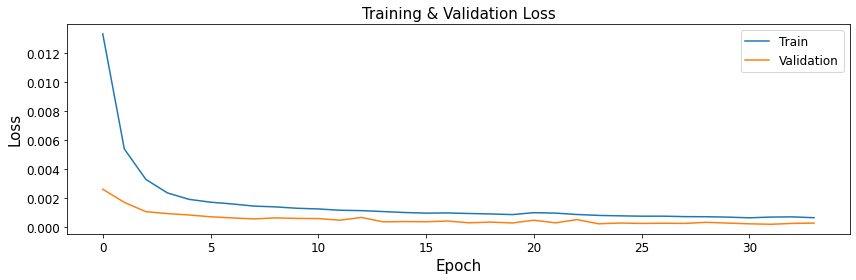

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,1,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

**We can also save the trained model to disk for later use, which can be done using following codes.**

In [ ]:
from keras.models import load_model

# save the model to disk
model.save("object_detection_model_simple.h5")

# load the model from disk
model_loaded = load_model("object_detection_model_simple.h5")


# Question: if we continue to train the data using the loaded model 'model_loaded', what will happen? Any difference?

**Predict bounding boxes on the test images**

In [ ]:
# Predict bounding boxes on the train images.
train_pred_y = model.predict(train_X)
train_pred_bboxes = train_pred_y * img_size
train_pred_bboxes = train_pred_bboxes.reshape(len(train_pred_bboxes), 1, -1)
train_pred_bboxes.shape

summed_IOU_train = 0.
for pred_bbox_train, train_bbox_train in zip(train_pred_bboxes.reshape(-1, 4), train_bboxes.reshape(-1, 4)):
    summed_IOU_train += IOU(pred_bbox_train, train_bbox_train)
mean_IOU_train = summed_IOU_train / len(train_pred_bboxes)
print("Training IOU: ",mean_IOU_train)

Training IOU:  0.8372102977041259


In [ ]:
# Predict bounding boxes on the validation images.
test_pred_y = model.predict(test_X)
test_pred_bboxes = test_pred_y * img_size
test_pred_bboxes = test_pred_bboxes.reshape(len(test_pred_bboxes), 1, -1)
test_pred_bboxes.shape

summed_IOU_test = 0.
for pred_bbox_test, test_bbox in zip(test_pred_bboxes.reshape(-1, 4), test_bboxes.reshape(-1, 4)):
    summed_IOU_test += IOU(pred_bbox_test, test_bbox)
mean_IOU_test = summed_IOU_test / len(test_pred_bboxes)
print("Testing IOU: ",mean_IOU_test)

Testing IOU:  0.8206965209626579


**Step 7: Performance evaluation**

After the model is optimized, the next step is to estimate the model performance on unseen(test) data to get a generalization error.

For the bounding box prediction in object detection, one popular evaluation metric is called Intersection Over Union (IOU), which measures the overlap between the predicted and the real bounding box, as shown in Figure 5. It’s calculated by dividing the area of intersection (green in the image below) by the area of union (red). The IOU is between 0 (no overlap) and 1 (perfect overlap).  Therefore, we use this metric for performance evaluation.

The calculation is different from the accuracy score used in classification problems or the mean-square-error (MSE) score used in regression.



<div align="center">
<img src="https://slideplayer.com/slide/12753498/77/images/12/Useful+Metrics%3A+Intersection+over+Union+%28IoU%29.jpg" width="400">
<p>Figure 5. Illustration of IoU score in bounding box prediction</p>
</div>
  

**Define the calculation of IoU score**

In [ ]:
### Define the calculation of IoU score
def IOU(bbox1, bbox2):
    '''Calculate overlap between two bounding boxes [x, y, w, h] as the area of intersection over the area of unity'''
    x1, y1, w1, h1 = bbox1[0], bbox1[1], bbox1[2], bbox1[3]
    x2, y2, w2, h2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]

    w_I = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_I = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_I <= 0 or h_I <= 0:  # no overlap
        return 0.
    I = w_I * h_I

    U = w1 * h1 + w2 * h2 - I

    return I / U

**Calculate the mean IOU (overlap) between the predicted and expected bounding boxes on the test dataset.**

**Show a few images and predicted bounding boxes from the test dataset.**

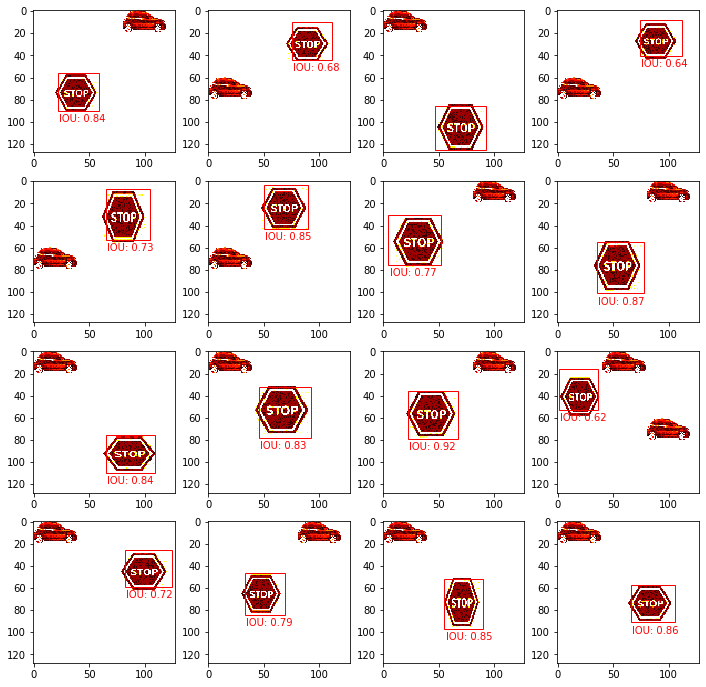

In [ ]:
plt.figure(figsize=(12, 12))
for i_subplot in range(1, 17):
    plt.subplot(4, 4, i_subplot)
    i = np.random.randint(len(test_imgs))
    plt.imshow(test_imgs[i], cmap='hot', interpolation='nearest')
    
    for pred_bbox, exp_bbox in zip(test_pred_bboxes[i], test_bboxes[i]):
        plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2], pred_bbox[3], ec='r', fc='none'))
        plt.annotate('IOU: {:.2f}'.format(IOU(pred_bbox, exp_bbox)), (pred_bbox[0]+1, pred_bbox[1]+pred_bbox[3]+10), color='r')


**Step 8: Test on Real data**

So far, we have trained a machine learning model that is able to detect the object in the image.  We can save the model to disk and reuse this model for real application when new test data is provided. 

In this section, suppose we have six new test images saved in folder 'test_data/', let's predict the bounding box for them using the model we have trained.






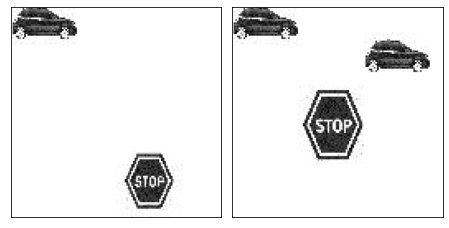

In [ ]:
from matplotlib import pyplot as plt
import glob

import base64
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

## plot first image
img_path ='dataset_object/test_data/test_1.jpg'
ax = fig.add_subplot(1,2,1, xticks=[], yticks=[])
# PIL image, convert to mode "P" to translates pixels through the palette and range of pixels still in [0,255] with color image 
img = Image.open(img_path).convert("P") 
ax.imshow(img)
img.close()

## plot second image
img_path ='dataset_object/test_data/test_2.jpg'
ax = fig.add_subplot(1,2,2, xticks=[], yticks=[])
img = Image.open(img_path).convert("P") 
ax.imshow(img)
img.close()


In [ ]:
import pickle
from keras.models import load_model
# This is my pre-trained model, you may need change the filename to your own model
# load the model from disk
model_loaded = load_model("object_detection_model_simple.h5")


**reload the imgs data without rerun everything in case the notebook is disconnected**

In [ ]:
%ls

checkmodel.h5       imgs_backup_10000.npy      imgs_box_backup_20000.npy
dataset_object/     imgs_backup_20000.npy      object_detection_model_simple.h5
dataset_object.zip  imgs_box_backup_10000.npy


In [ ]:
import numpy as np
#np.save('imgs_virus_50000', imgs) 
#np.save('imgs_virus_50000_box', bboxes) 

# if you can not find the file to load, you need save the data first using command above.
imgs = np.load('imgs_backup_10000.npy')
bboxes = np.load('imgs_backup_10000.npy')

**Get mean & std from training data to normalize the new test data.**

We need normalization because the training data was normalized before model training.
Different datasets have different statistics for normalization.

In [ ]:
train_mean = np.mean(imgs)
train_std = np.std(imgs)

print(train_mean, train_std)

# train_mean: 237.3404705810547 
# train_std: 57.27800179345832


237.3365155456543 57.278528413835716


**Loading new test data (unseen data)**

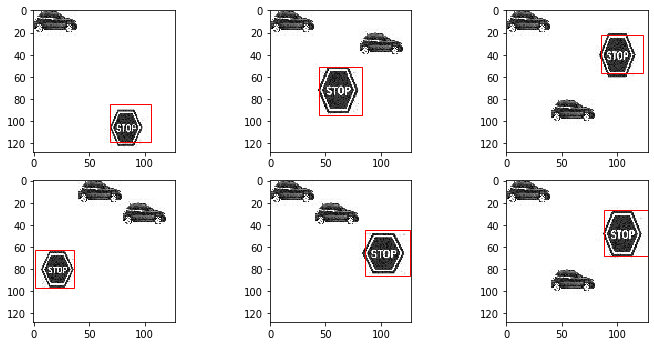

In [ ]:
### Loading new test data
img_size = 128 
plt.figure(figsize=(12, 12))
idx=1
for test_img in sorted(glob.glob('dataset_object/test_data/*.jpg')):
  img = Image.open(test_img) # RGB mode with three channel
  img = img.convert("P")  # convert into one channel
  img = img.resize((img_size, img_size)) # resize
  # convert into numpy array
  img_data = np.asarray(img).copy()
  img_data[img_data>=np.quantile(img_data,0.8)] = 255 # set background to white
  
  ### normalize test data using mean & std from training
  img_data = (img_data.reshape(1, img_data.shape[0]*img_data.shape[1]) - train_mean) / train_std

  ### Make a prediction 
  pred_bbox = model.predict(img_data)[0]
  pred_bbox = pred_bbox*img_size
  
  # Show a few images and predicted bounding boxes from the test dataset. 
  plt.subplot(4, 3, idx)
  idx +=1
  plt.imshow(img, cmap='hot', interpolation='nearest')
  plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2], pred_bbox[3], ec='r', fc='none'))


**Step 9: Manually label the images using labeling tool**

In step 8, we successfully predict the bounding boxes for new data. It looks good. However, we are not sure how accurate the prediction is. Therefore, we need to provide the true bounding box information for evaluation using the IOU metric we described in step 7.  

We can practice a graphical image annotation tool to manually draw the bounding box around the target object to get position information. In this practicum, let's use an image labeling tool called [LabelImg](https://github.com/tzutalin/labelImg), as shown in Figure 6.

<div align="center">
<img src="https://cs.slu.edu/~hou/5750/homework/hw07/label_image_1.png" width="500">
<p>Figure 6. Annotating images with bounding box using graphical tool: LabelImg.</p>
</div>

The LabelImg will save object's position information in Pascal VOC format (xml format), which is a format for providing object detection data, i.e. images with bounding boxes. The VOC file has similar content as shown in Figure 7, which contains four key information:

1.  filename: file name of image (i.e. virus_2.png)
2.  name: class name of labeled object, (i.e. coronavirus)
3.  width, height, and depth: the image information
4.  xmin, ymin, xmax, ymax：bounding box pixels positions are denoted by the top left-hand corner and bottom right-hand corner. (i.e. 160, 249, 303, 397)

<div align="center">
<img src="https://cs.slu.edu/~hou/5750/homework/hw07/xml_voc.png" width="300">
<p>Figure 7. A sample XML annotation file based on Pascal VOC format.</p>
</div>






**Install LabelImg tool**

The installation of LabelImg is very straightforward. If you have python3 installed on your laptop (Mac user can check if python3 has been installed, if not, may refer to steps in [install python3 in mac](https://docs.python-guide.org/starting/install3/osx/), Windows user may consider installing anaconda-python3 by refering to steps in [install python3 in windows](https://www.datacamp.com/community/tutorials/installing-anaconda-windows)

We can use 'pip3' to install LabelImg by typing 'pip3 install Labelimg' in terminal. If everything is going well, you should see similar messages as shown in Figure 8. 

<div align="center">
<img src="https://cs.slu.edu/~hou/5750/homework/hw07/labelImg_1.png" width="400">
<p>Figure 8. Install LabelImg using pip3.</p>
</div>

After LabelImg is installed, we can open LabelImg by typing 'LabelImg' in terminal, as shown in Figure 9, and the graphical interface of the tool will automatically pop up as Figure 10.
<div align="center">
<img src="https://cs.slu.edu/~hou/5750/homework/hw07/LabelImg_2.png" width="400">
<p>Figure 9. Open LabelImg.</p>
</div>
<div align="center">
<img src="https://cs.slu.edu/~hou/5750/homework/hw07/LabelImg_3.png" width="400">
<p>Figure 10. Graphical interface of LabelImg.</p>
</div>


Now let's load the image by clicking the 'Open' icon in the left panel, and choose your image that you want to assign labels.  


To drow the bounding box, we can click 'Create RectBox' in the left panel, and 
Now let's load the image by clicking the 'Open' icon in the left panel, and you are able to draw the rectangular box around the object by holding and draging the mouse. After that, one dialog box will pop up for you to enter the name of the object, as shown in Figure 12. 
<div align="center">
<img src="https://cs.slu.edu/~hou/5750/homework/hw07/LabelImg_5.png" width="400">
<p>Figure 11. Loaded image in LabelImg.</p>
</div>

Finally, clicking 'Save' icon in the left panel to save the position information, and you should see a new xml file generated in your specified folder (i.e. class_1.xml).



**Parsing Annotation file for evaluation**

Then we should be able to evaluate our prediction performance using the bounding box information we provide in image. 

Here we provide a function to parse XML file and extract key information for bounding box. We will talk about this evaluation part later.

In [ ]:
### Here we define a function to extract information from VOC XML format file.
import xml.etree.ElementTree as ET
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        for box in boxes.findall("bndbox"):
            ymin = int(box.find("ymin").text)
            xmin = int(box.find("xmin").text)
            ymax = int(box.find("ymax").text)
            xmax = int(box.find("xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)

    return filename, list_with_all_boxes


In [ ]:
name, boxes = read_content("dataset_object/test_data/test_1.xml")
print(name)
print(boxes)


test_1.jpg
[[66, 88, 100, 125]]


**Homework 07 for Practicum**

Please practice the following questions to better undertand this practicum for the object detection problem. 

1. Label all 6 test images saved in 'dataset_object/test_data'. 


2. Increase the number of images in training data, to see if the performance of object detection (average IoU score) can be improved.

3. Change the neural network architecture to convolutional neural network architecture


**Requirement:**

Submit the notebook 
Submit a summary from this practicum to Canvas: Homework 07
Due: Nov 2, Monday, 23:59pm